# CERES

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [2]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['disk']['observations']

In [3]:
ceres = cat['CERES']#['ebaf-toa42']#['woa18_2005_2017']
print(list(ceres))

['ebaf-toa41', 'ebaf-toa42', 'ebaf-sfc41', 'ebaf-sfc42', 'syn-toa41']


In [4]:
toa41=ceres['ebaf-toa41']['monthly'].to_dask()

In [5]:
toa41

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180, time: 265)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2022-03-15
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    solar_mon                    (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldarea_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

In [14]:
toa41['toa_net_all_mon']

<xarray.DataArray 'toa_net_all_mon' (time: 265, lat: 180, lon: 360)>
dask.array<open_dataset-294f87b98188b10ed05f43eb7b01cb02toa_net_all_mon, shape=(265, 180, 360), dtype=float32, chunksize=(265, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2022-03-15
Attributes:
    long_name:      Top of The Atmosphere Net Flux, All-Sky conditions, Month...
    standard_name:  TOA Net Flux - All-Sky
    CF_name:        toa_net_downward_flux
    comment:        none
    units:          W m-2
    valid_min:           -400.000
    valid_max:            400.000

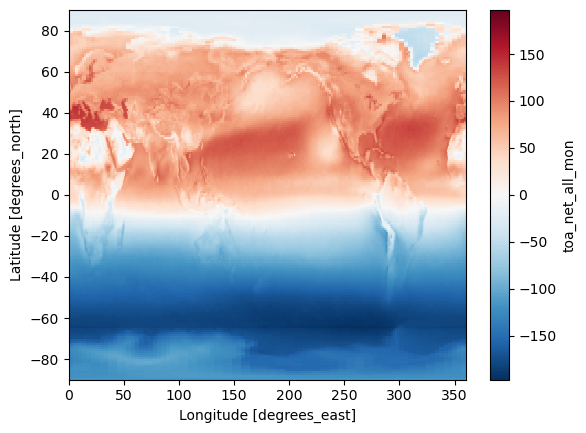

In [16]:
toa41['toa_net_all_mon'].sel(time=toa41.time.dt.month==6).mean(dim='time').plot()